# Análise sobre os Acidentes nas Rodovias Federais do Brasil no Ano de 2019. 

# 1 Perguntas Para Análise

Procurar responder as perguntas:

Quais as rodovias mais perigosas?

Qual tipo de carro mais causa acidentes?

Qual o estado que mais tem acidentes?

Clima no dia do acidente



In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import plotly.offline as py
import plotly.graph_objs as go
from folium.plugins import MarkerCluster
from folium import plugins
%matplotlib inline

In [2]:
#importando os dados
df = pd.read_csv('acidentes2019.csv', sep =';', encoding ='latin1')

#mostrar todo o dataset
pd.set_option('display.max_columns', None)

df.head()


id     pesid data_inversa   dia_semana   horario  uf     br     km  \
0  182256.0  403856.0   2019-01-01  terça-feira  04:00:00  CE  116.0  136,9   
1  182263.0  402859.0   2019-01-01  terça-feira  05:00:00  MT  158.0  599,5   
2  182277.0  402850.0   2019-01-01  terça-feira  10:00:00  PA   10.0     34   
3  182289.0  402431.0   2019-01-01  terça-feira  08:30:00  BA  101.0     13   
4  182307.0  402642.0   2019-01-01  terça-feira  13:50:00  BA  116.0    440   

          municipio               causa_acidente              tipo_acidente  \
0            RUSSAS             Animais na Pista    Atropelamento de Animal   
1          AGUA BOA  Defeito Mecânico no Veículo                   Incêndio   
2        DOM ELISEU      Velocidade Incompatível           Colisão traseira   
3          RIO REAL           Ingestão de Álcool           Colisão traseira   
4  FEIRA DE SANTANA           Ingestão de Álcool  Saída de leito carroçável   

  classificacao_acidente   fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas  Amanhecer  Decrescente                  Vento   
1            Sem Vítimas  Amanhecer  Decrescente         Garoa/Chuvisco   
2            Sem Vítimas  Pleno dia  Decrescente                Nublado   
3    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   
4    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   

  tipo_pista        tracado_via uso_solo  id_veiculo     tipo_veiculo  \
0    Simples              Curva      Não      324937         Caminhão   
1    Simples               Reta      Não      324940         Caminhão   
2    Simples      Não Informado      Não      324958  Caminhão-trator   
3      Dupla  Desvio Temporário      Não      324987  Caminhão-trator   
4      Dupla              Curva      Não      325030  Caminhão-trator   

                      marca  ano_fabricacao_veiculo tipo_envolvido  \
0  I/MB 15SPRINT RONTAN AMB                  2012.0       Condutor   
1          FORD/CARGO 815 N                  2011.0       Condutor   
2         VOLVO/FH 540 6X4T                  2012.0       Condutor   
3         SCANIA/R 440 A6X2                  2018.0       Condutor   
4       VOLVO/FH12 380 4X2T                  2003.0     Passageiro   

   estado_fisico  idade       sexo  ilesos  feridos_leves  feridos_graves  \
0          Ileso   35.0  Masculino       1              0               0   
1          Ileso   30.0  Masculino       1              0               0   
2          Ileso   54.0  Masculino       1              0               0   
3          Ileso   43.0  Masculino       1              0               0   
4  Lesões Graves   37.0  Masculino       0              0               1   

   mortos     latitude     longitude regional delegacia       uop  
0       0    -4,766018    -38,056034    SR-CE   DEL16/3  UOP01/CE  
1       0      -14,319       -52,169    SR-MT    DEL2/8  UOP02/MT  
2       0  -4,15296734  -47,54608154    SR-PA   DEL19/2  UOP03/PA  
3       0     -11,5896      -37,8761    SR-SE   DEL20/2  UOP03/SE  
4       0      -12,344       -39,087    SR-BA   DEL10/2  UOP01/BA

## 2 Limpeza dos dados

In [3]:
df.dtypes

id                        float64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                  int64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos        

In [4]:
df.describe()

id          pesid             br     id_veiculo  \
count  162273.000000  162272.000000  162042.000000  162273.000000   
mean   221717.416865  492648.269313     217.467971  395616.163009   
std     22637.125797   51063.880978     132.050917   40807.363805   
min    182210.000000  402087.000000      10.000000  324863.000000   
25%    202070.000000  448657.750000     101.000000  360260.000000   
50%    221655.000000  493085.500000     163.000000  395854.000000   
75%    241471.000000  536997.250000     354.000000  431382.000000   
max    266627.000000  594393.000000     495.000000  475775.000000   

       ano_fabricacao_veiculo          idade         ilesos  feridos_leves  \
count           152353.000000  146514.000000  162273.000000  162273.000000   
mean              2009.417799      39.879711       0.422954       0.372829   
std                  7.536433      51.426590       0.494030       0.483559   
min               1900.000000       0.000000       0.000000       0.000000   
25%               2007.000000      27.000000       0.000000       0.000000   
50%               2011.000000      37.000000       0.000000       0.000000   
75%               2014.000000      48.000000       1.000000       1.000000   
max               2019.000000    2018.000000       1.000000       1.000000   

       feridos_graves         mortos  
count   162273.000000  162273.000000  
mean         0.114455       0.032864  
std          0.318364       0.178282  
min          0.000000       0.000000  
25%          0.000000       0.000000  
50%          0.000000       0.000000  
75%          0.000000       0.000000  
max          1.000000       1.000000

In [5]:
#Removendo duplicatas se houver
df.drop_duplicates(keep=False, inplace=True)

In [6]:
#Verificando dados faltosos
df.isnull().sum().sort_values(ascending=False)

idade                     15759
ano_fabricacao_veiculo     9920
uop                        8519
marca                      8151
br                          231
km                          231
pesid                         1
tipo_acidente                 0
sentido_via                   0
fase_dia                      0
classificacao_acidente        0
municipio                     0
causa_acidente                0
tipo_pista                    0
uf                            0
horario                       0
dia_semana                    0
data_inversa                  0
condicao_metereologica        0
uso_solo                      0
tracado_via                   0
delegacia                     0
id_veiculo                    0
tipo_veiculo                  0
tipo_envolvido                0
estado_fisico                 0
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude

In [7]:
#Dropando colunas com muitos dados faltosos e outras que não serão cosideradas para essa análise.

def remocao(lista_features):
    for i in lista_features:
        df.drop(i,axis=1,inplace=True)
remocao(['id','pesid','marca','ano_fabricacao_veiculo','uop','delegacia','regional','id_veiculo'])
df.head()


data_inversa   dia_semana   horario  uf     br     km         municipio  \
0   2019-01-01  terça-feira  04:00:00  CE  116.0  136,9            RUSSAS   
1   2019-01-01  terça-feira  05:00:00  MT  158.0  599,5          AGUA BOA   
2   2019-01-01  terça-feira  10:00:00  PA   10.0     34        DOM ELISEU   
3   2019-01-01  terça-feira  08:30:00  BA  101.0     13          RIO REAL   
4   2019-01-01  terça-feira  13:50:00  BA  116.0    440  FEIRA DE SANTANA   

                causa_acidente              tipo_acidente  \
0             Animais na Pista    Atropelamento de Animal   
1  Defeito Mecânico no Veículo                   Incêndio   
2      Velocidade Incompatível           Colisão traseira   
3           Ingestão de Álcool           Colisão traseira   
4           Ingestão de Álcool  Saída de leito carroçável   

  classificacao_acidente   fase_dia  sentido_via condicao_metereologica  \
0            Sem Vítimas  Amanhecer  Decrescente                  Vento   
1            Sem Vítimas  Amanhecer  Decrescente         Garoa/Chuvisco   
2            Sem Vítimas  Pleno dia  Decrescente                Nublado   
3    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   
4    Com Vítimas Feridas  Pleno dia  Decrescente              Céu Claro   

  tipo_pista        tracado_via uso_solo     tipo_veiculo tipo_envolvido  \
0    Simples              Curva      Não         Caminhão       Condutor   
1    Simples               Reta      Não         Caminhão       Condutor   
2    Simples      Não Informado      Não  Caminhão-trator       Condutor   
3      Dupla  Desvio Temporário      Não  Caminhão-trator       Condutor   
4      Dupla              Curva      Não  Caminhão-trator     Passageiro   

   estado_fisico  idade       sexo  ilesos  feridos_leves  feridos_graves  \
0          Ileso   35.0  Masculino       1              0               0   
1          Ileso   30.0  Masculino       1              0               0   
2          Ileso   54.0  Masculino       1              0               0   
3          Ileso   43.0  Masculino       1              0               0   
4  Lesões Graves   37.0  Masculino       0              0               1   

   mortos     latitude     longitude  
0       0    -4,766018    -38,056034  
1       0      -14,319       -52,169  
2       0  -4,15296734  -47,54608154  
3       0     -11,5896      -37,8761  
4       0      -12,344       -39,087

/home/bruno/Modelos/DataScience/grazielly/estudos/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



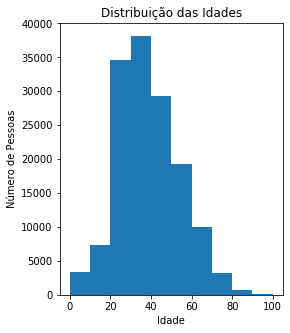

In [8]:
#Tratando dados faltosos de idade
#observando a distribuição
plt.figure(figsize=(4, 5))
plt.hist(df.idade, bins=range(0, 110,10), normed=False)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.show()

In [9]:
# Preenchendo os valores nulos da coluna 'idade'
df['idade'].fillna(df['idade'].mean(), inplace=True)
df['idade'] = df['idade'].astype('int')

In [10]:
# Agrupando as idades em categorias:
# 0-15 anos (Crianca), 16-20 anos (Jovem), 20-59 anos (Adulto), 59-78 anos (Idoso)


df['idade'] = pd.cut(df['idade'],[0,15,20,59,78], labels=['Crianca','Jovem','Adulto','Idoso'])

In [11]:
#Tratando dados faltosos de  KM / transformando str em float / adc a media p dados ausentes
df['km']=df['km'].str.replace('.', '').str.replace(',', '.').astype("float")
df['km'].fillna(df['km'].mean(), inplace=True)

In [12]:
#Tratando dados faltoses de br

df['br'].fillna(0, inplace=True)

In [13]:
#tratando latitude/ ',' por '.' e obj por float.
df['latitude']=df['latitude'].str.replace('.', '').str.replace(',', '.').astype("float")

In [14]:
#tratando longitude/ ',' por '.' e obj por float
df['longitude']=df['longitude'].str.replace('.', '').str.replace(',', '.').astype("float")

In [15]:
#tratando tipo de veiculos
df.tipo_veiculo.unique()

array(['Caminhão', 'Caminhão-trator', 'Reboque', 'Semireboque',
       'Automóvel', 'Motoneta', 'Bicicleta', 'Caminhonete', 'Camioneta',
       'Motocicleta', 'Utilitário', 'Micro-ônibus', 'Ônibus',
       'Ciclomotor', 'Outros', 'Carro de mão', 'Trator de rodas',
       'Trem-bonde', 'Triciclo', 'Carroça-charrete', 'Não Informado',
       'Quadriciclo', 'Trator misto', 'Trator de esteira'], dtype=object)

In [16]:
df.tipo_veiculo.replace(['Caminhão-trator','Camioneta','Motoneta','Trem-bonde'],['Caminhão','Caminhonete','Motocicleta','Trem'], inplace=True)
df.tipo_veiculo.replace(['Trator de rodas','Trator misto','Trator de esteira'],'Trator', inplace=True)
df.tipo_veiculo.replace(['Ciclomotor','Triciclo','Quadriciclo'],'Bicicleta_motorizada', inplace=True)

In [17]:
df.shape

(162273, 27)

# 3 Começando análise exploratória

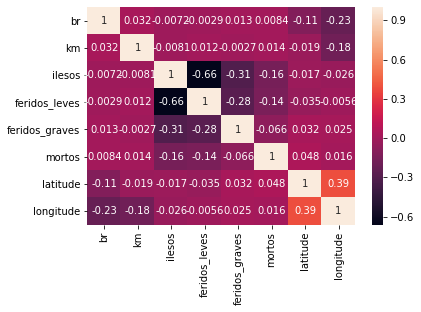

In [19]:
sns.heatmap(df.corr(), annot=True)

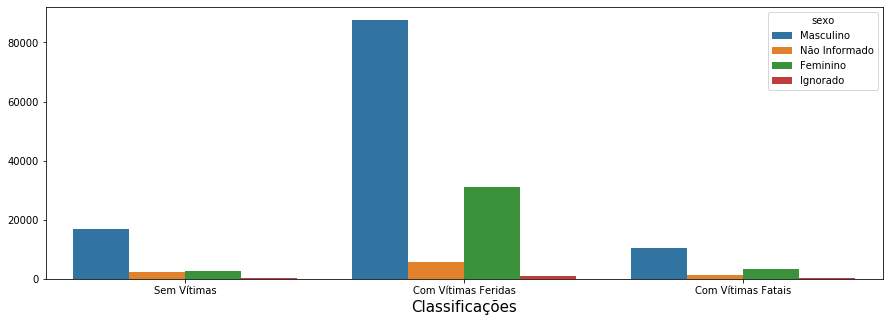

In [20]:
#Analisando a classificacao_acidentes com sexo. 
plt.figure(figsize=(15,5))
sns.countplot(x='classificacao_acidente',data=df,hue='sexo')
plt.xlabel('Classificações',size=15)
plt.ylabel('')
plt.show()

Maior número de mortes está entres os homens.

In [21]:
#Estados onde há mais acidentes
estados_maiores_acidentes = df['uf'].value_counts().head(10)
estados_maiores_acidentes

MG    21380
SC    19574
PR    18259
RS    11425
RJ    10889
SP    10223
BA     8888
GO     8040
ES     6581
PE     6405
Name: uf, dtype: int64

O estado brasileiro que mais possui acidentes é Minas Gerais. 

In [22]:
#BR que há mais acidente
br_maiores_acidentes = df['br'].value_counts().head(10)
br_maiores_acidentes

101.0    25989
116.0    22417
381.0     7985
40.0      7810
153.0     6416
364.0     5424
163.0     4894
277.0     4703
470.0     4595
262.0     4427
Name: br, dtype: int64

A Br em que há mais acidentes é a Br 101,116,381, respectivamente. 

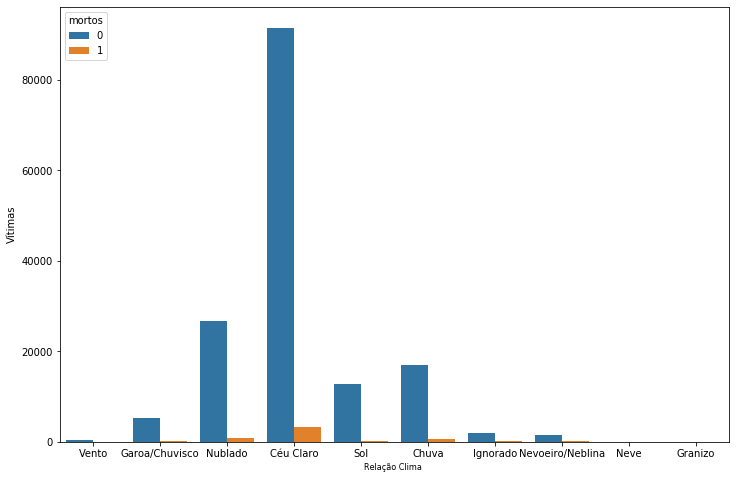

In [23]:
#Verificando se há relação entre o clima com o aumento dos acidentes
plt.figure(figsize=(12,8))
sns.countplot(x='condicao_metereologica',data=df,hue='mortos')
plt.xlabel('Relação Clima ',size=8)
plt.ylabel('Vítimas')
plt.show()

A maioria dos acidentes ocorrem em céu claro.

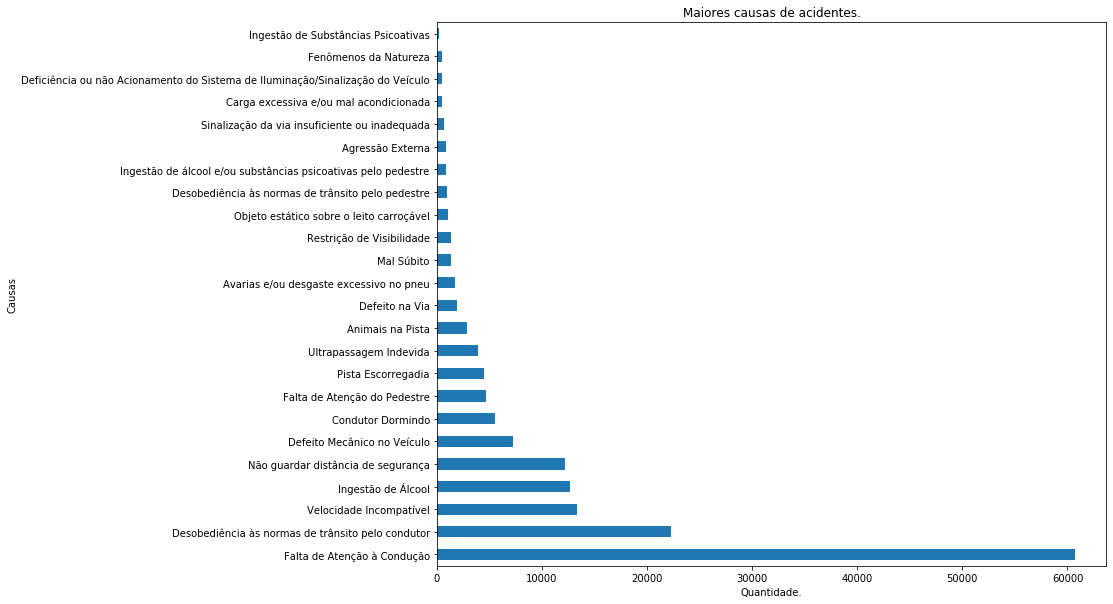

In [24]:
# Verificando a maior causa dos acidentes. 
fig = plt.figure(figsize=(12,10))
fig = df['causa_acidente'].value_counts().plot.barh()
fig.set_title("Maiores causas de acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Causas')
plt.show()

O top 5 das maiores causas de acidentes no ano de 2019 foi devido a falta de atenção à condução, seguido de desobediência as normas de trânsito pelo condutor, velocidade incompatível, ingestão de álcool e não aderir a distância miníma de segurança. 

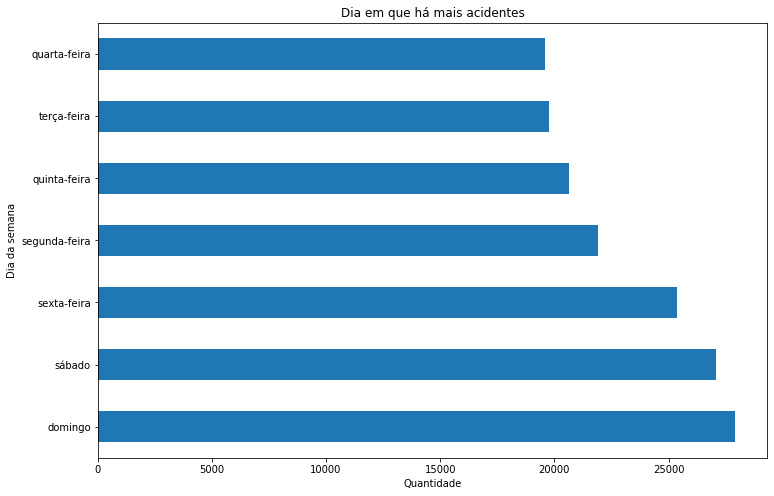

In [25]:
#Verificando o dia da semana que ocorrem mais acidentes.
fig = plt.figure(figsize=(12,8))
fig = df['dia_semana'].value_counts().plot.barh()
fig.set_title("Dia em que há mais acidentes")
fig.set_xlabel('Quantidade')
fig.set_ylabel('Dia da semana')
plt.show()

Os acidentes ocorrem mais nos fins de semana. 

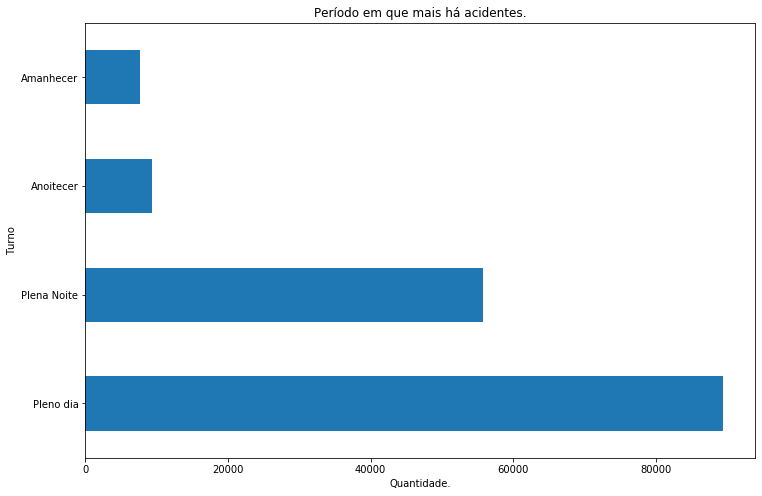

In [26]:
# Verificando o turno em que há mais acidentes. 
fig = plt.figure(figsize=(12,8))
fig = df['fase_dia'].value_counts().plot.barh()
fig.set_title("Período em que mais há acidentes.")
fig.set_xlabel('Quantidade.')
fig.set_ylabel('Turno')
plt.show()

In [27]:
#Relação entre o tipo de acidentes com número de mortos. 

tipo_de_acidente= df.groupby('tipo_acidente')[['mortos']].count().sort_values(by='mortos',ascending= False).head(20)
tipo_de_acidente.reset_index(inplace=True)

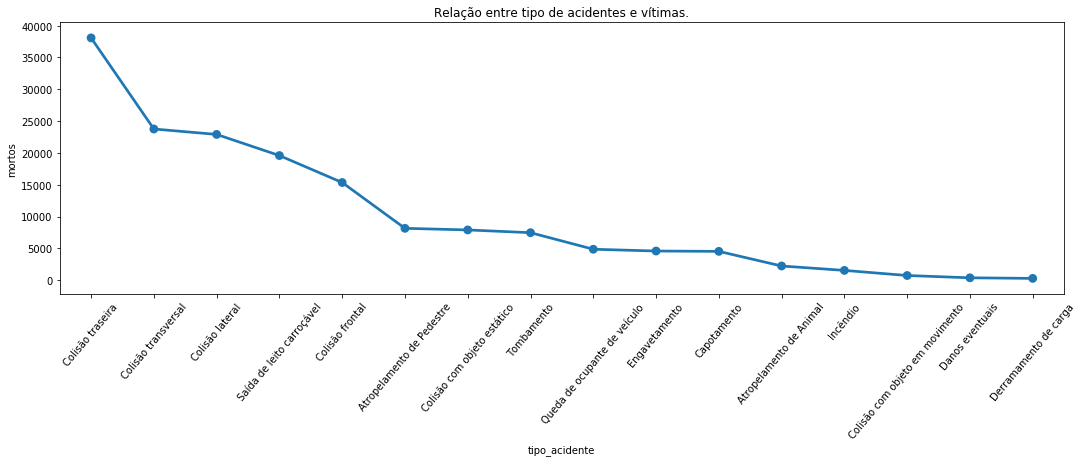

In [29]:
plt.figure(figsize=(18,5))
sns.pointplot(x='tipo_acidente', y='mortos',data=tipo_de_acidente)
plt.xticks(rotation=50)
plt.title('Relação entre tipo de acidentes e vítimas.')
plt.show()

In [30]:
#Relação dos acidentes com tipo de pista. 
df.groupby('tipo_veiculo')['tipo_pista'].value_counts().head(20)

tipo_veiculo          tipo_pista
Automóvel             Simples       36219
                      Dupla         28825
                      Múltipla       5606
Bicicleta             Simples        1041
                      Dupla           847
                      Múltipla        198
Bicicleta_motorizada  Simples         263
                      Dupla           171
                      Múltipla         33
Caminhonete           Simples       10799
                      Dupla          6525
                      Múltipla       1064
Caminhão              Simples       14052
                      Dupla          8379
                      Múltipla       1154
Carro de mão          Dupla             4
                      Simples           2
Carroça-charrete      Simples          48
                      Dupla            41
                      Múltipla          7
Name: tipo_pista, dtype: int64

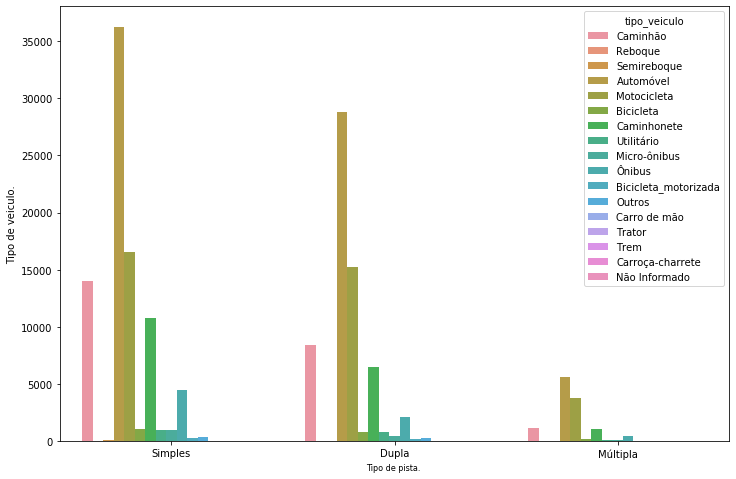

In [31]:
#Relação dos acidentes com tipo de pista. 
plt.figure(figsize=(12,8))
sns.countplot(x='tipo_pista',data=df,hue='tipo_veiculo')
plt.xlabel('Tipo de pista. ',size=8)
plt.ylabel('Tipo de veiculo.')
plt.show()

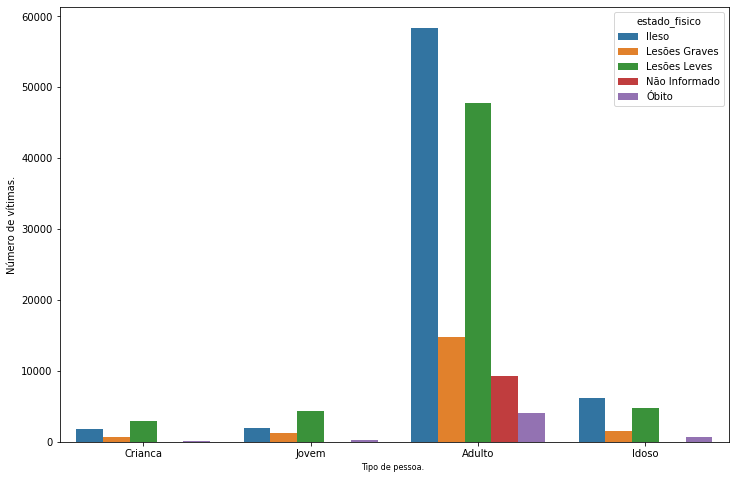

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='idade',data=df,hue='estado_fisico')
plt.xlabel('Tipo de pessoa. ',size=8)
plt.ylabel('Número de vítimas.')
plt.show()

In [33]:
#Criando mapa de calor das br que mais causam acidentes.

# Extraindo as coordenadas de 162273 registros:
coordenadas=[]
for lat,lng in zip(df.latitude.values[:162273],df.longitude.values[:162273]):
  coordenadas.append([lat,lng])

In [34]:
# Renderizando o mapa com algumas personalizações:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Terrain')

In [35]:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

    Conclusão: 

Após a análise, pode-se verificar que o estado que apresenta maiores indíces de acidentes é o de Minas Gerais, dando uma pesquisada na literatura, tal evento pode ser explicado, pois Minas é o estado que apresenta curvas muito assentuadas, e grande parte dos acidentes envolve homens, além disso e os acidentes ocorrem mais à ceú aberto o acontecimento pode ser explicado, pois á céu aberto, os motoristas tendo um melhor visibilidade da pista tendem a 'correr' mais. Em correlação a isto, uma grande parcela dos acidetntes envolvem conlições traseiras, devido a falta de atenção dos motoristas em alta velocidade. 
    
Fica evidente também após a análise que pista com vias multiplas diminuem fortemente os índices de acidentes. 